In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
region_name = "Hawaii"
xlim = (-156.00, -154.75)
ylim = (18.9, 19.9)
zlim = (0, 40)
zlim_special = None
size = 1.0
alpha = 0.5
max_sigma = 1.5

In [7]:
output_path = Path(region_name)
if not output_path.exists():
    output_path.mkdir()

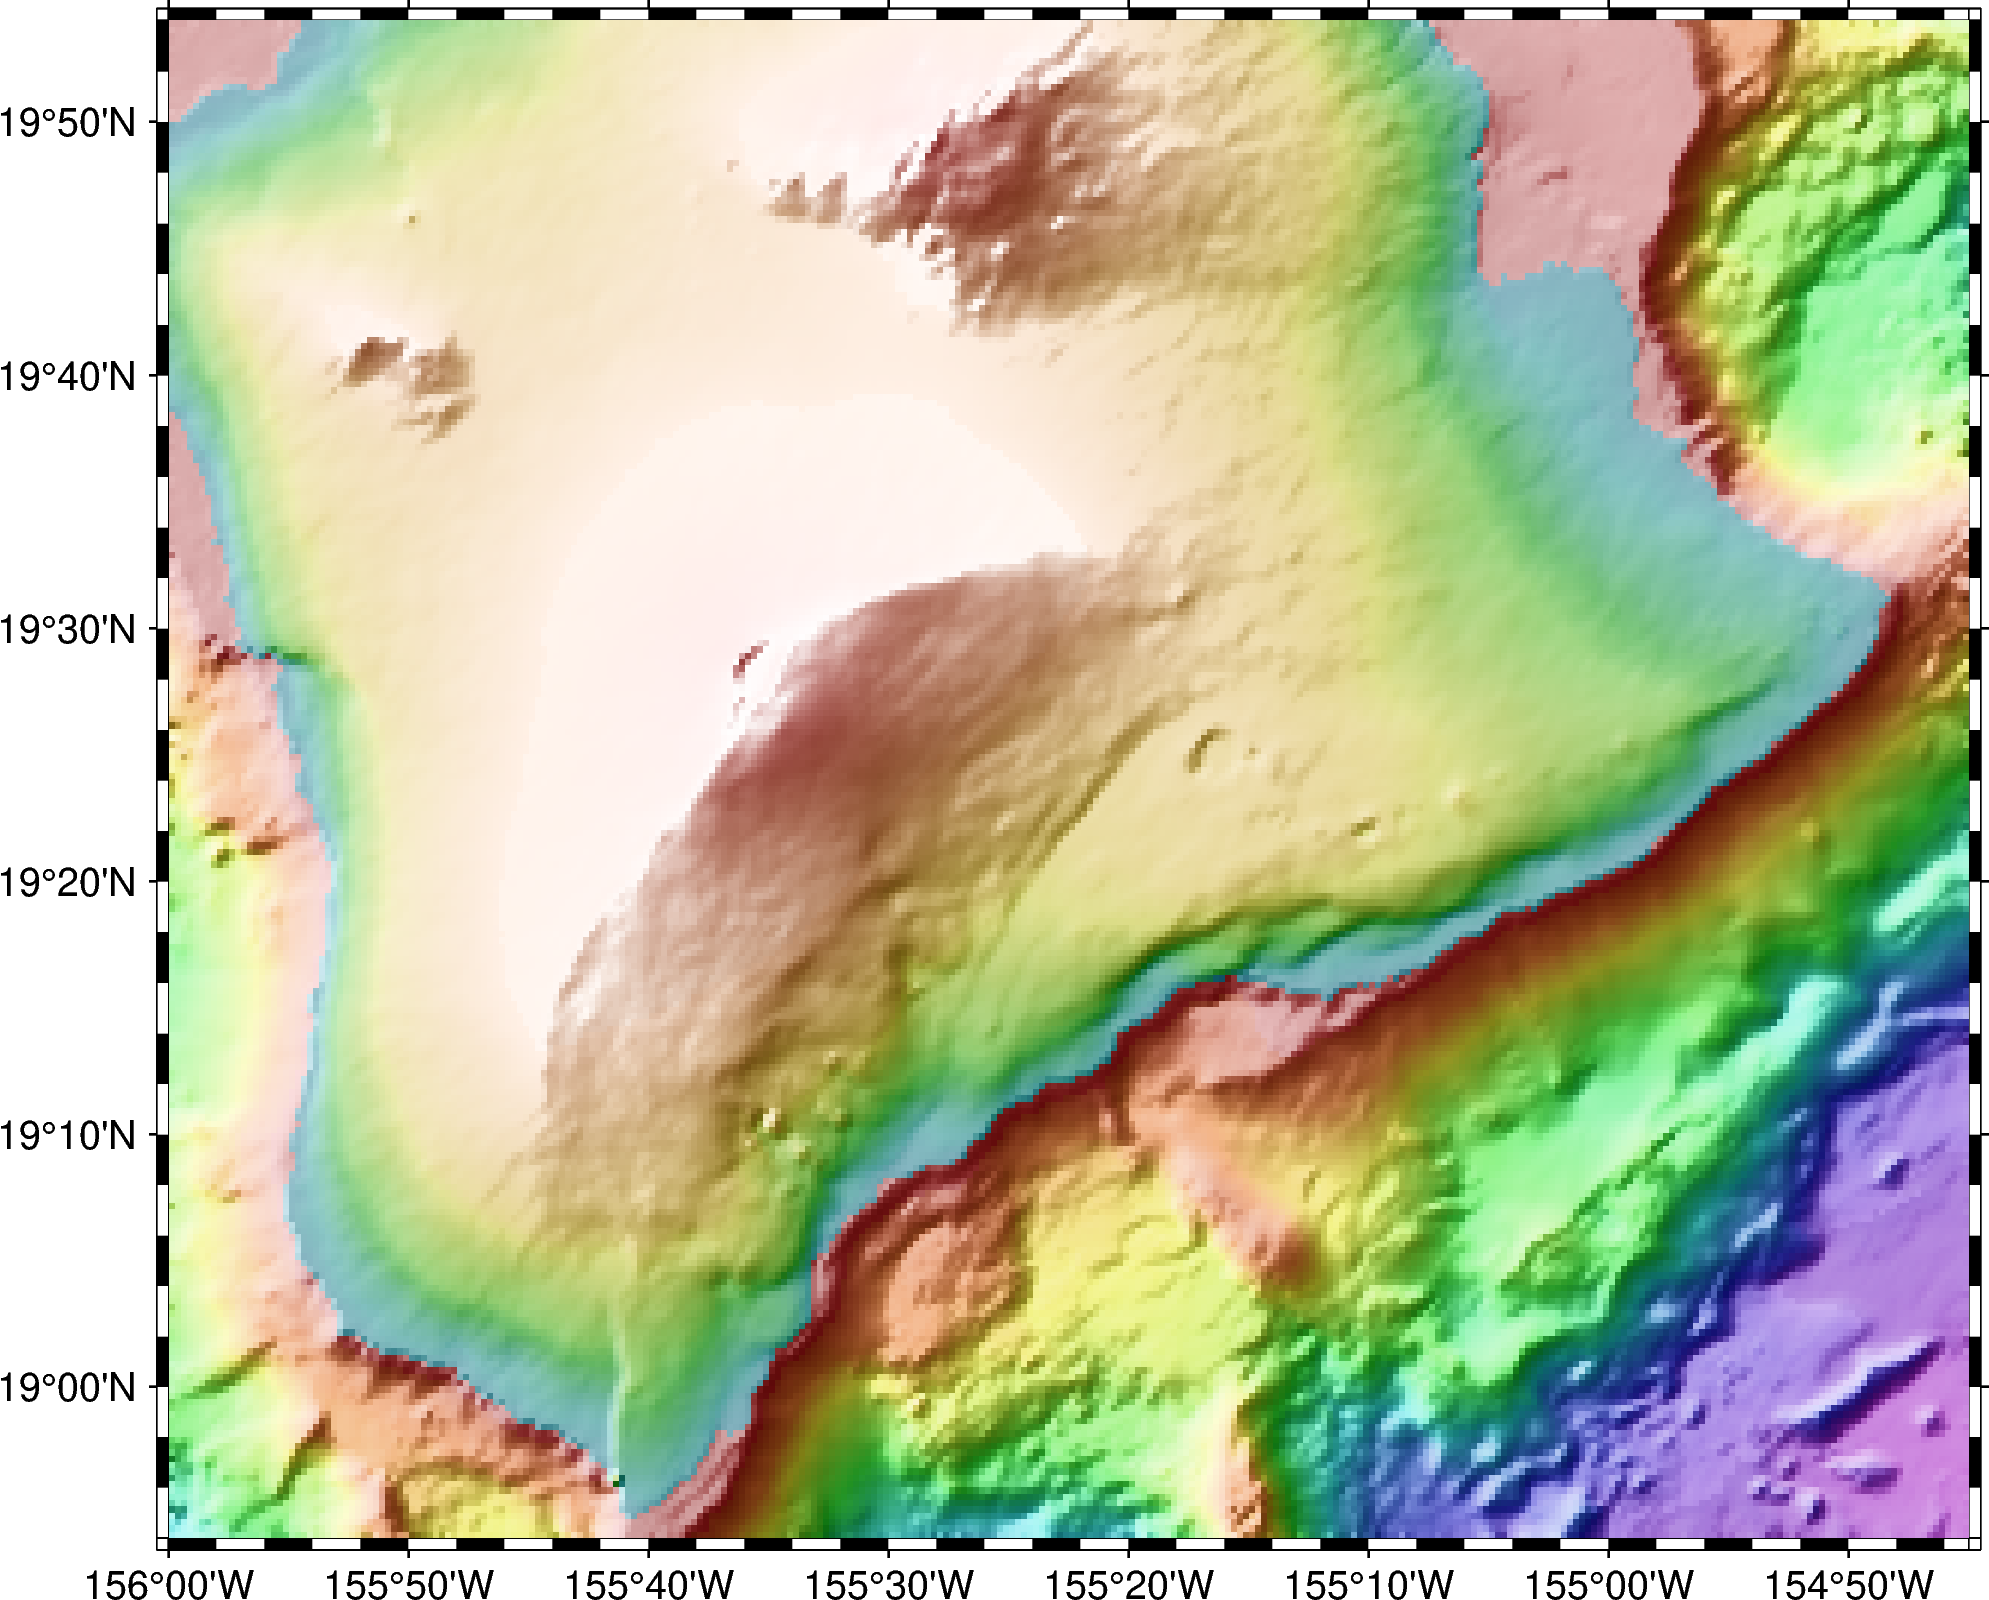

In [8]:
import pygmt
region = xlim + ylim
# region = np.array(region) + np.array([-1, 1, -1, 1])*0.2
stations = pd.read_csv("das_info.csv", sep="\t")
fig = pygmt.Figure()
fig.basemap(region=region, projection="M6i", frame=True)
fig.grdimage("@earth_relief_15s", cmap="topo", shading=True)
# fig.grdimage("@earth_relief_03s", cmap="sealand", shading=True)
# fig.colorbar()

# grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
# dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])
# pygmt.makecpt(cmap="gray", series=[-50000, 20000, 1000], continuous=True)
# fig.grdimage(grid=grid, cmap=True, shading=True)

# fig.grdimage(grid=dgrid, cmap=True, shading=True)
# fig.colorbar(truncate=[-4000, 4001])

# fig.plot(x=stations["longitude"], y=stations["latitude"], style="t0.5", color="blue", pen="black", label="Station")
# fig.plot(x=catalog_hypoDD["longitude"], y=catalog_hypoDD["latitude"], style="c", size=1, color="black")

fig.savefig(f"{region_name}/topography.pdf")
fig.savefig(f"{region_name}/topography.png")
fig.show()

In [13]:
catalog_gamma = pd.read_csv("catalog_gamma_.csv")

NameError: name 'c_gamma' is not defined

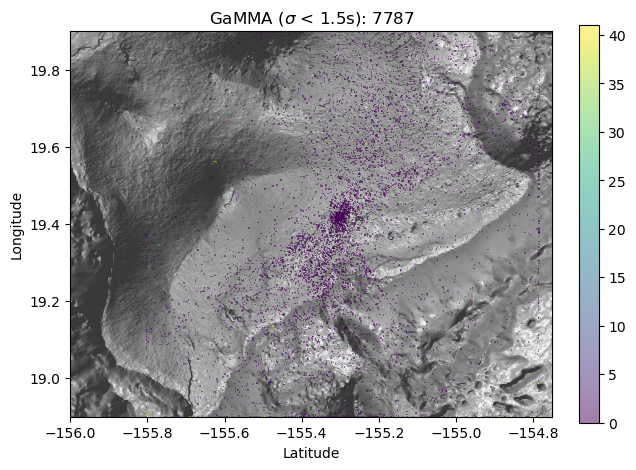

In [15]:
plt.figure(figsize=(15, 6))
palette = "viridis"

grid = pygmt.datasets.load_earth_relief(resolution="03s", region=region)
dgrid = pygmt.grdgradient(grid=grid, radiance=[135, 25])
# dgrid = pygmt.grdgradient(grid=grid)

xgrid = np.linspace(xlim[0], xlim[1], grid.shape[1])
ygrid = np.linspace(ylim[0], ylim[1], grid.shape[0])

im_ratio = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])

plt.subplot(121)
plt.pcolormesh(xgrid, ygrid, dgrid, shading="gouraud", cmap="gray", alpha=0.3, vmin=-1.5, rasterized=True)
im = plt.scatter(catalog_gamma["longitude"], catalog_gamma["latitude"], s=size, c=catalog_gamma["depth_km"], alpha=alpha, marker=",", cmap=palette, linewidth=0, rasterized=True)
# plt.pcolormesh(xgrid, ygrid, dgrid, shading="gouraud", cmap="gray", alpha=0.1, rasterized=True)
plt.title(f"GaMMA ($\sigma$ < {max_sigma:.1f}s): {len(catalog_gamma)}")
plt.axis("scaled")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

# cbar = plt.colorbar(im, fraction=0.047*im_ratio)
# cbar.set_ticks(np.linspace(c_gamma.min(), c_gamma.max(), 4))
# cbar.ax.set_yticklabels([pd.to_datetime(x, unit='s').strftime('%b %d %Y') for x in np.linspace(t_gamma.min().timestamp(), t_gamma.max().timestamp(), 4)])

plt.tight_layout()

plt.savefig(f"{region_name}/GaMMA2HypoDD_latitude_vs_longitude_color_by_time.pdf", bbox_inches="tight", dpi=600)
plt.savefig(f"{region_name}/GaMMA2HypoDD_latitude_vs_longitude_color_by_time.png", bbox_inches="tight", dpi=600)
plt.show()